In [1]:
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
import cvxpy as cp

Q1

In [2]:
# example of a 1d objective function

# objective function
def objective1(x):
    y=1-abs(x)
    return y

# define range for input
r_min, r_max = -2.0, 2.0
# sample input range uniformly at 0.1 increments
inputs1 = arange(r_min, r_max, 0.01)
results1 = objective1(inputs1)

In [3]:
# example of a 1d objective function

# objective function
def objective2(x):
    y=-1+abs(x)
    return y

# define range for input
r_min, r_max = -2.0, 2.0
# sample input range uniformly at 0.1 increments
inputs2 = arange(r_min, r_max, 0.01)
results2 = objective2(inputs2)

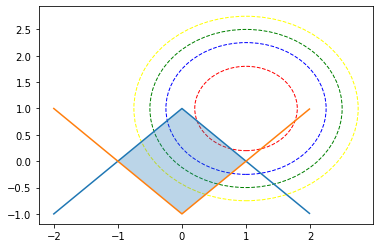

In [4]:
plt.axes()

circle = plt.Circle((1,1),0.8, color='none', ec='red', linestyle='--')
plt.gca().add_patch(circle)

circle = plt.Circle((1,1),1.25, color='none', ec='blue', linestyle='--')
plt.gca().add_patch(circle)

circle = plt.Circle((1,1),1.5, color='none', ec='green', linestyle='--')
plt.gca().add_patch(circle)

circle = plt.Circle((1,1),1.75, color='none', ec='yellow', linestyle='--')
plt.gca().add_patch(circle)

# create a line plot of input vs result
plt.plot(inputs1, results1)
plt.plot(inputs2, results2)
# define corner points
x = [-1,0,1,0]
y = [0,-1,0,1]
# plot
plt.fill(x,y, alpha=0.3)
#cross = inputs1[results1-results2 <= 0][0]
#plt.fill_between(inputs1, results1, results2, where=(inputs1>-1) and (inputs1<1 ), color='#539ecd')
# show the plot

plt.show()

Q2

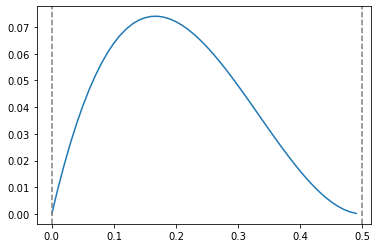

In [5]:
# example of a 1d objective function

# objective function
def objective3(x):
    y=x*(1-2*x)**2
    return y

# define range for input
r_min, r_max = 0, 0.5
# sample input range uniformly at 0.1 increments
inputs3 = arange(r_min, r_max, 0.01)
results3 = objective3(inputs3)

# create a line plot of input vs result
plt.plot(inputs3, results3)
plt.axvline(x=0.5, linestyle='--', color='gray')
plt.axvline(x=0, linestyle='--', color='gray')

Q4

In [6]:
# Import libraries
# import yfinance as yf
from pandas_datareader import data as pdr
import pandas as pd

# Define variables 
tickers = "WMT V MSFT"
start = "2019-07-31"
end = "2021-07-30"
tickers_split = tickers.split()
df = pd.DataFrame()
tickers_split
for ticker in tickers_split:
    data = pdr.get_data_yahoo(ticker, start=start, end=end, interval='m')
    df[ticker] = data['Adj Close']
print(df.shape)
display(df)

(24, 3)


,WMT,V,MSFT
Date,,,
2019-08-01,110.032547,178.374466,134.620514
2019-09-01,114.851578,169.928467,136.215134
2019-10-01,113.477386,176.695557,140.467224
2019-11-01,115.248360,182.277176,148.315094
2019-12-01,115.006416,185.937088,155.032852
2020-01-01,111.293701,196.891418,167.350922
2020-02-01,104.673843,179.861237,159.269943
2020-03-01,110.448013,159.667770,155.466171
2020-04-01,118.679436,177.109116,176.660294


In [7]:
"""
Portfolio optimization with CVXPY
See examples at http://cvxpy.org
Author: Shabbir Ahmed
"""

# read monthly_prices.csv
mp = df
mr = pd.DataFrame()

# compute monthly returns
for s in mp.columns:
    date = mp.index[0]
    pr0 = mp[s][date] 
    for t in range(1,len(mp.index)):
        date = mp.index[t]
        pr1 = mp[s][date]
        ret = (pr1-pr0)/pr0
        mr.at[date,s]=ret
        pr0 = pr1
        
# get symbol names
symbols = mr.columns

# convert monthly return data frame to a numpy matrix
return_data = mr.values.T

# compute mean return
r = np.asarray(np.mean(return_data, axis=1))

# covariance
C = np.asmatrix(np.cov(return_data))


# print out expected return and std deviation
print("----------------------")
for j in range(len(symbols)):
    print ('%s: Exp ret = %f, Risk = %f' %(symbols[j],r[j], C[j,j]**0.5))
   


----------------------
WMT: Exp ret = 0.012204, Risk = 0.046988
V: Exp ret = 0.016945, Risk = 0.077543
MSFT: Exp ret = 0.034284, Risk = 0.051618


In [8]:
# set up optimization model
n = len(symbols)
x = cp.Variable(n)
req_return = 0.02
ret = r.T*x
risk = cp.Minimize(cp.quad_form(x, C))
const=[ cp.sum(x) == 1, ret >= req_return, x >= 0]
prob = cp.Problem(risk, const)

prob


C:\Users\bbalamdari\Anaconda3\lib\site-packages\cvxpy\expressions\expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


Problem(Minimize(Expression(CONVEX, NONNEGATIVE, (1, 1))), [Equality(Expression(AFFINE, UNKNOWN, ()), Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, ZERO, ()))])

In [12]:
# solve problem and write solution
result=prob.solve()
result
print(x.value)
print('ret. value: ', ret.value)
print('risk: ', result**0.5)

[5.58364694e-01 2.61634492e-21 4.41635306e-01]
ret. value:  0.021955087043358235
risk:  0.03801470815051022
